In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd

In [26]:
# Importing the dataset

dataset = pd.read_csv('age_height.csv')
dataset.head()

,Age(year),Height(ft)
0,0.0,0.5
1,1.0,1.5
2,2.0,2.0
3,3.0,2.5
4,NaN,9.0


In [27]:
dataset.dropna(inplace=True)
dataset.head()

,Age(year),Height(ft)
0,0.0,0.5
1,1.0,1.5
2,2.0,2.0
3,3.0,2.5
5,4.0,3.0


In [28]:
# independent and Dependent Values

x = dataset['Age(year)']
y = dataset['Height(ft)']

In [33]:
x

0      0.0
1      1.0
2      2.0
3      3.0
5      4.0
6      5.0
8      6.0
9      7.0
10     8.0
11     9.0
12    10.0
13    11.0
14    12.0
Name: Age(year), dtype: float64

In [34]:
x.ndim

1

In [35]:
y

0     0.5
1     1.5
2     2.0
3     2.5
5     3.0
6     4.0
8     4.2
9     5.0
10    5.2
11    5.4
12    5.5
13    5.7
14    5.8
Name: Height(ft), dtype: float64

In [36]:
# Convert 1d to 2d

x = x[:,np.newaxis]
x.shape

(13, 1)

In [37]:
# Convert 1d to 2d

y = y[:,np.newaxis]
y.shape

(13, 1)

In [38]:
# Fitting Linear Regression to the dataset

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
# Fitting Polynomial Regression to the dataset

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 6)
x_poly = poly_reg.fit_transform(x)
poly_reg.fit(x_poly, y)

PolynomialFeatures(degree=6, include_bias=True, interaction_only=False)

In [40]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

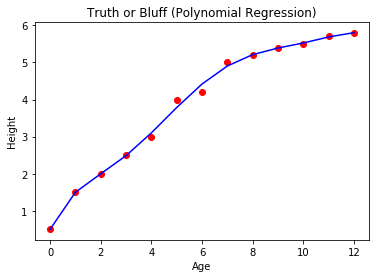

In [42]:
# Visualising the Polynomial Regression results

plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

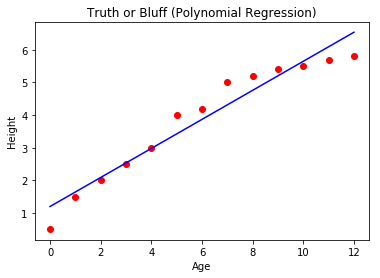

In [43]:
# Visualising the Linear Regression results

lr=LinearRegression()
yp=lr.fit(x,y).predict(x)
plt.scatter(x, y, color = 'red')
plt.plot(x, yp, color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

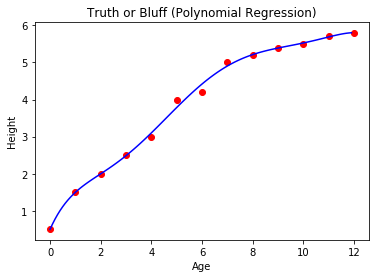

In [45]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)

x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, lin_reg_2.predict(poly_reg.fit_transform(x_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

In [47]:
# Predicting a new result with Linear Regression
print(lin_reg.predict([[3.5]]))

# Predicting a new result with Polynomial Regression
print(lin_reg_2.predict(poly_reg.fit_transform([[3.5]])))

[[2.75796703]]
[[2.77867368]]


In [48]:
dataset

,Age(year),Height(ft)
0,0.0,0.5
1,1.0,1.5
2,2.0,2.0
3,3.0,2.5
5,4.0,3.0
6,5.0,4.0
8,6.0,4.2
9,7.0,5.0
10,8.0,5.2
11,9.0,5.4


In [49]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred =lin_reg_2.predict(poly_reg.fit_transform(x))
mse = mean_squared_error(y, y_pred)
mse

0.008825061578098068

In [50]:
r_squared = r2_score(y, y_pred)
r_squared

0.9970082736766859